In [122]:
import pandas as pd

### Hamzah Yaacob

#### **Group Members**: Purva Kapshikar, Hamzah Yaacob, Jackson Zeng

#### **Topic**: Real-time bus information for Oakland, CA

##### In this excercise, I analyze census tracts around AC Transit route 19 that runs through heavily minority areas of Downtown Oakland, Alameda and South Oakland. Census tracts have been analyzed across 3 dimensions: namely demographics, housing profile (i.e. number of renters), transportation choices (i.e. predominant mode of transportation to get to work), and a combination of these factors. The purpose of this excercise is to find areas that could be a suitable candidate for the installation of real-time bus information at bus stops according to the profile of the census tracts along the aforesaid bus route. 

In [123]:
import geopandas as gpd

In [3]:
dataset = pd.read_csv("Route_19.csv")

##### After downloading the data, I check the first five rows of my dataset.

In [4]:
dataset.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,...,SE_A09005_008,PCT_SE_A09005_002,PCT_SE_A09005_009,PCT_SE_A09005_010,PCT_SE_A09005_003,PCT_SE_A09005_004,PCT_SE_A09005_005,PCT_SE_A09005_006,PCT_SE_A09005_007,PCT_SE_A09005_008
0,6001402600,"Census Tract 4026, Alameda County, California",ACSSF,ca,140,0,2839,NaN,NaN,NaN,...,66,53.10,44.61,8.50,13.73,0.00,0.82,14.87,6.70,10.78
1,6001402700,"Census Tract 4027, Alameda County, California",ACSSF,ca,140,0,2840,NaN,NaN,NaN,...,148,44.11,33.33,10.77,31.57,0.00,4.12,7.24,0.51,12.46
2,6001402801,"Census Tract 4028.01, Alameda County, California",ACSSF,ca,140,0,2841,NaN,NaN,NaN,...,433,20.51,19.47,1.04,38.62,1.75,2.84,11.71,0.88,23.69
3,6001402802,"Census Tract 4028.02, Alameda County, California",ACSSF,ca,140,0,2842,NaN,NaN,NaN,...,95,14.80,8.59,6.21,44.87,3.58,2.86,7.88,3.34,22.67
4,6001402900,"Census Tract 4029, Alameda County, California",ACSSF,ca,140,0,2843,NaN,NaN,NaN,...,142,16.73,15.21,1.52,50.70,0.00,2.41,12.17,0.00,18.00


##### Check the characteristics of my data. It has 28 rows and 100 columns. 

In [5]:
dataset.shape

(28, 100)

##### Overide defaults to see the entire table.

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
dataset.sample()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_UACP,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_VTD,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_PUMA5,Geo_PUMA1,Geo_GEOID,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_A03001_001,SE_A03001_002,SE_A03001_003,SE_A03001_004,SE_A03001_005,SE_A03001_006,SE_A03001_007,SE_A03001_008,PCT_SE_A03001_002,PCT_SE_A03001_003,PCT_SE_A03001_004,PCT_SE_A03001_005,PCT_SE_A03001_006,PCT_SE_A03001_007,PCT_SE_A03001_008,SE_A10062B_001,SE_A10062B_002,SE_A10062B_003,SE_A10062B_004,SE_A10062B_005,SE_A10062B_006,PCT_SE_A10062B_002,PCT_SE_A10062B_003,PCT_SE_A10062B_004,PCT_SE_A10062B_005,PCT_SE_A10062B_006,SE_A09005_001,SE_A09005_002,SE_A09005_009,SE_A09005_010,SE_A09005_003,SE_A09005_004,SE_A09005_005,SE_A09005_006,SE_A09005_007,SE_A09005_008,PCT_SE_A09005_002,PCT_SE_A09005_009,PCT_SE_A09005_010,PCT_SE_A09005_003,PCT_SE_A09005_004,PCT_SE_A09005_005,PCT_SE_A09005_006,PCT_SE_A09005_007,PCT_SE_A09005_008
8,6001403302,"Census Tract 4033.02, Alameda County, California",ACSSF,ca,140,0,2847,NaN,NaN,NaN,NaN,6,1,NaN,NaN,403302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06001403302,Census Tract 4033.02,NaN,NaN,NaN,2279,1124,92,53,593,0,46,371,49.32,4.04,2.33,26.02,0.0,2.02,16.28,1398,73,0,1325,0,0,5.22,0.0,94.78,0.0,0.0,1870,537,513,24,631,99,55,278,31,239,28.72,27.43,1.28,33.74,5.29,2.94,14.87,1.66,12.78


##### Here I query the data types in the dataset. It gives me each column and the nature of the values in each column.

In [8]:
dataset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 100 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Geo_FIPS            28 non-null     int64  
 1   Geo_QName           28 non-null     object 
 2   Geo_FILEID          28 non-null     object 
 3   Geo_STUSAB          28 non-null     object 
 4   Geo_SUMLEV          28 non-null     int64  
 5   Geo_GEOCOMP         28 non-null     int64  
 6   Geo_LOGRECNO        28 non-null     int64  
 7   Geo_US              0 non-null      float64
 8   Geo_REGION          0 non-null      float64
 9   Geo_DIVISION        0 non-null      float64
 10  Geo_STATECE         0 non-null      float64
 11  Geo_STATE           28 non-null     int64  
 12  Geo_COUNTY          28 non-null     int64  
 13  Geo_COUSUB          0 non-null      float64
 14  Geo_PLACE           0 non-null      float64
 15  Geo_TRACT           28 non-null     int64  
 16  Geo_BLKGR

##### Next I check the nature of my FIPS, state and county code to make sure they are not an integer, but a string instead.

In [9]:
dataset.Geo_FIPS.head()

0    6001402600
1    6001402700
2    6001402801
3    6001402802
4    6001402900
Name: Geo_FIPS, dtype: int64

In [10]:
dataset.Geo_STATE.head()

0    6
1    6
2    6
3    6
4    6
Name: Geo_STATE, dtype: int64

In [11]:
dataset.Geo_COUNTY.head()

0    1
1    1
2    1
3    1
4    1
Name: Geo_COUNTY, dtype: int64

##### Here I alter the values in the FIPS, State and County columns to become strings.

In [12]:
dataset = pd.read_csv(
    'Route_19.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

##### That didn't work so I manually add a 0 in front of my FIPS code.

In [13]:
dataset['Geo_FIPS'] = dataset['Geo_FIPS'].apply(lambda x: x.zfill(11))

In [14]:
dataset.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_UACP,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_VTD,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_PUMA5,Geo_PUMA1,Geo_GEOID,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_A03001_001,SE_A03001_002,SE_A03001_003,SE_A03001_004,SE_A03001_005,SE_A03001_006,SE_A03001_007,SE_A03001_008,PCT_SE_A03001_002,PCT_SE_A03001_003,PCT_SE_A03001_004,PCT_SE_A03001_005,PCT_SE_A03001_006,PCT_SE_A03001_007,PCT_SE_A03001_008,SE_A10062B_001,SE_A10062B_002,SE_A10062B_003,SE_A10062B_004,SE_A10062B_005,SE_A10062B_006,PCT_SE_A10062B_002,PCT_SE_A10062B_003,PCT_SE_A10062B_004,PCT_SE_A10062B_005,PCT_SE_A10062B_006,SE_A09005_001,SE_A09005_002,SE_A09005_009,SE_A09005_010,SE_A09005_003,SE_A09005_004,SE_A09005_005,SE_A09005_006,SE_A09005_007,SE_A09005_008,PCT_SE_A09005_002,PCT_SE_A09005_009,PCT_SE_A09005_010,PCT_SE_A09005_003,PCT_SE_A09005_004,PCT_SE_A09005_005,PCT_SE_A09005_006,PCT_SE_A09005_007,PCT_SE_A09005_008
0,06001402600,"Census Tract 4026, Alameda County, California",ACSSF,ca,140,0,2839,NaN,NaN,NaN,NaN,6,1,NaN,NaN,402600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06001402600,Census Tract 4026,NaN,NaN,NaN,1299,197,437,4,454,0,38,169,15.17,33.64,0.31,34.95,0.0,2.93,13.01,1140,134,183,817,0,6,11.75,16.05,71.67,0.00,0.53,612,325,273,52,84,0,5,91,41,66,53.10,44.61,8.50,13.73,0.00,0.82,14.87,6.70,10.78
1,06001402700,"Census Tract 4027, Alameda County, California",ACSSF,ca,140,0,2840,NaN,NaN,NaN,NaN,6,1,NaN,NaN,402700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06001402700,Census Tract 4027,NaN,NaN,NaN,1988,616,717,0,313,0,252,90,30.99,36.07,0.00,15.74,0.0,12.68,4.53,1160,201,461,487,11,0,17.33,39.74,41.98,0.95,0.00,1188,524,396,128,375,0,49,86,6,148,44.11,33.33,10.77,31.57,0.00,4.12,7.24,0.51,12.46
2,06001402801,"Census Tract 4028.01, Alameda County, California",ACSSF,ca,140,0,2841,NaN,NaN,NaN,NaN,6,1,NaN,NaN,402801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06001402801,Census Tract 4028.01,NaN,NaN,NaN,3301,990,1230,31,582,0,67,401,29.99,37.26,0.94,17.63,0.0,2.03,12.15,2799,105,294,2389,11,0,3.75,10.50,85.35,0.39,0.00,1828,375,356,19,706,32,52,214,16,433,20.51,19.47,1.04,38.62,1.75,2.84,11.71,0.88,23.69
3,06001402802,"Census Tract 4028.02, Alameda County, California",ACSSF,ca,140,0,2842,NaN,NaN,NaN,NaN,6,1,NaN,NaN,402802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06001402802,Census Tract 4028.02,NaN,NaN,NaN,1251,284,583,0,195,0,56,133,22.70,46.60,0.00,15.59,0.0,4.48,10.63,938,0,20,918,0,0,0.00,2.13,97.87,0.00,0.00,419,62,36,26,188,15,12,33,14,95,14.80,8.59,6.21,44.87,3.58,2.86,7.88,3.34,22.67
4,06001402900,"Census Tract 4029, Alameda County, California",ACSSF,ca,140,0,2843,NaN,NaN,NaN,NaN,6,1,NaN,NaN,402900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06001402900,Census Tract 4029,NaN,NaN,NaN,1638,426,291,3,742,0,100,76,26.01,17.77,0.18,45.30,0.0,6.11,4.64,1509,0,15,1494,0,0,0.00,0.99,99.01,0.00,0.00,789,132,120,12,400,0,19,96,0,142,16.73,15.21,1.52,50.70,0.00,2.41,12.17,0.00,18.00


In [15]:
dataset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 100 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Geo_FIPS            28 non-null     object 
 1   Geo_QName           28 non-null     object 
 2   Geo_FILEID          28 non-null     object 
 3   Geo_STUSAB          28 non-null     object 
 4   Geo_SUMLEV          28 non-null     int64  
 5   Geo_GEOCOMP         28 non-null     int64  
 6   Geo_LOGRECNO        28 non-null     int64  
 7   Geo_US              0 non-null      float64
 8   Geo_REGION          0 non-null      float64
 9   Geo_DIVISION        0 non-null      float64
 10  Geo_STATECE         0 non-null      float64
 11  Geo_STATE           28 non-null     object 
 12  Geo_COUNTY          28 non-null     object 
 13  Geo_COUSUB          0 non-null      float64
 14  Geo_PLACE           0 non-null      float64
 15  Geo_TRACT           28 non-null     int64  
 16  Geo_BLKGR

##### Next I look up the columns that have null values.

In [16]:
dataset.columns[dataset.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA5',
 'Geo_PUMA1',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

##### Then I drop the columns with empty values and check my dataset again.

In [17]:
dataset = dataset.dropna(axis=1,how="all")

In [18]:
dataset.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_GEOID,Geo_NAME,SE_A03001_001,SE_A03001_002,SE_A03001_003,SE_A03001_004,SE_A03001_005,SE_A03001_006,SE_A03001_007,SE_A03001_008,PCT_SE_A03001_002,PCT_SE_A03001_003,PCT_SE_A03001_004,PCT_SE_A03001_005,PCT_SE_A03001_006,PCT_SE_A03001_007,PCT_SE_A03001_008,SE_A10062B_001,SE_A10062B_002,SE_A10062B_003,SE_A10062B_004,SE_A10062B_005,SE_A10062B_006,PCT_SE_A10062B_002,PCT_SE_A10062B_003,PCT_SE_A10062B_004,PCT_SE_A10062B_005,PCT_SE_A10062B_006,SE_A09005_001,SE_A09005_002,SE_A09005_009,SE_A09005_010,SE_A09005_003,SE_A09005_004,SE_A09005_005,SE_A09005_006,SE_A09005_007,SE_A09005_008,PCT_SE_A09005_002,PCT_SE_A09005_009,PCT_SE_A09005_010,PCT_SE_A09005_003,PCT_SE_A09005_004,PCT_SE_A09005_005,PCT_SE_A09005_006,PCT_SE_A09005_007,PCT_SE_A09005_008
0,06001402600,"Census Tract 4026, Alameda County, California",ACSSF,ca,140,0,2839,6,1,402600,14000US06001402600,Census Tract 4026,1299,197,437,4,454,0,38,169,15.17,33.64,0.31,34.95,0.0,2.93,13.01,1140,134,183,817,0,6,11.75,16.05,71.67,0.00,0.53,612,325,273,52,84,0,5,91,41,66,53.10,44.61,8.50,13.73,0.00,0.82,14.87,6.70,10.78
1,06001402700,"Census Tract 4027, Alameda County, California",ACSSF,ca,140,0,2840,6,1,402700,14000US06001402700,Census Tract 4027,1988,616,717,0,313,0,252,90,30.99,36.07,0.00,15.74,0.0,12.68,4.53,1160,201,461,487,11,0,17.33,39.74,41.98,0.95,0.00,1188,524,396,128,375,0,49,86,6,148,44.11,33.33,10.77,31.57,0.00,4.12,7.24,0.51,12.46
2,06001402801,"Census Tract 4028.01, Alameda County, California",ACSSF,ca,140,0,2841,6,1,402801,14000US06001402801,Census Tract 4028.01,3301,990,1230,31,582,0,67,401,29.99,37.26,0.94,17.63,0.0,2.03,12.15,2799,105,294,2389,11,0,3.75,10.50,85.35,0.39,0.00,1828,375,356,19,706,32,52,214,16,433,20.51,19.47,1.04,38.62,1.75,2.84,11.71,0.88,23.69
3,06001402802,"Census Tract 4028.02, Alameda County, California",ACSSF,ca,140,0,2842,6,1,402802,14000US06001402802,Census Tract 4028.02,1251,284,583,0,195,0,56,133,22.70,46.60,0.00,15.59,0.0,4.48,10.63,938,0,20,918,0,0,0.00,2.13,97.87,0.00,0.00,419,62,36,26,188,15,12,33,14,95,14.80,8.59,6.21,44.87,3.58,2.86,7.88,3.34,22.67
4,06001402900,"Census Tract 4029, Alameda County, California",ACSSF,ca,140,0,2843,6,1,402900,14000US06001402900,Census Tract 4029,1638,426,291,3,742,0,100,76,26.01,17.77,0.18,45.30,0.0,6.11,4.64,1509,0,15,1494,0,0,0.00,0.99,99.01,0.00,0.00,789,132,120,12,400,0,19,96,0,142,16.73,15.21,1.52,50.70,0.00,2.41,12.17,0.00,18.00


##### I list all the remaining columns that have a non-null value in them.

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Geo_FIPS            28 non-null     object 
 1   Geo_QName           28 non-null     object 
 2   Geo_FILEID          28 non-null     object 
 3   Geo_STUSAB          28 non-null     object 
 4   Geo_SUMLEV          28 non-null     int64  
 5   Geo_GEOCOMP         28 non-null     int64  
 6   Geo_LOGRECNO        28 non-null     int64  
 7   Geo_STATE           28 non-null     object 
 8   Geo_COUNTY          28 non-null     object 
 9   Geo_TRACT           28 non-null     int64  
 10  Geo_GEOID           28 non-null     object 
 11  Geo_NAME            28 non-null     object 
 12  SE_A03001_001       28 non-null     int64  
 13  SE_A03001_002       28 non-null     int64  
 14  SE_A03001_003       28 non-null     int64  
 15  SE_A03001_004       28 non-null     int64  
 16  SE_A03001_

##### I select the columns of interest that I want to keep.

In [20]:
columns_to_keep = ['Geo_FIPS',
                   'SE_A03001_001',
                   'SE_A03001_002',
                   'SE_A03001_003',
                   'SE_A03001_004',
                   'SE_A03001_005',
                   'SE_A03001_006',
                   'SE_A03001_007',
                   'SE_A03001_008',
                   'SE_A10062B_001',
                   'SE_A09005_001',
                   'SE_A09005_002',
                   'SE_A09005_009',
                   'SE_A09005_010',
                   'SE_A09005_003',
                   'SE_A09005_004',
                   'SE_A09005_005',
                   'SE_A09005_006',
                   'SE_A09005_007', 
                   'SE_A09005_008']

dataset3 = dataset[columns_to_keep]

In [21]:
columns = list(dataset3)
columns

['Geo_FIPS',
 'SE_A03001_001',
 'SE_A03001_002',
 'SE_A03001_003',
 'SE_A03001_004',
 'SE_A03001_005',
 'SE_A03001_006',
 'SE_A03001_007',
 'SE_A03001_008',
 'SE_A10062B_001',
 'SE_A09005_001',
 'SE_A09005_002',
 'SE_A09005_009',
 'SE_A09005_010',
 'SE_A09005_003',
 'SE_A09005_004',
 'SE_A09005_005',
 'SE_A09005_006',
 'SE_A09005_007',
 'SE_A09005_008']

##### I then rename the columns that I want to keep according to the data they represent.

In [22]:
dataset3.columns = ['FIPS',
'TotalPop',
'White Alone',
'Black or African American Alone',
'American Indian and Alaska Native Alone',
'Asian Alone',
'Native Hawaiian or Other Pacific Islander Alone',
'Some Other Race Alone',
'Two or More Races',
'Total Population in Renter Occupied Housing Units',
'Workers 16 years and Over',
                   'Car, Truck or Van',
                   'Drove Alone','Carpooled',
                   'Public Transportation [Includes Taxicab]',
                   'Motorcycle', 'Bicycle','Walked', 'Other Means', 'Worked At Home']


##### Check my table again.

In [23]:
dataset3.sample(5)

,FIPS,TotalPop,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian or Other Pacific Islander Alone,Some Other Race Alone,Two or More Races,Total Population in Renter Occupied Housing Units,Workers 16 years and Over,"Car, Truck or Van",Drove Alone,Carpooled,Public Transportation [Includes Taxicab],Motorcycle,Bicycle,Walked,Other Means,Worked At Home
5,06001403000,2907,239,43,10,2373,73,37,132,1808,1010,398,346,52,247,0,0,258,0,107
2,06001402801,3301,990,1230,31,582,0,67,401,2799,1828,375,356,19,706,32,52,214,16,433
19,06001427200,4418,1749,190,0,1771,49,218,441,2407,2451,1398,1358,40,294,15,64,166,18,496
17,06001408800,7688,404,2924,38,336,159,2732,1095,4999,3028,2229,1864,365,323,0,123,140,134,79
1,06001402700,1988,616,717,0,313,0,252,90,1160,1188,524,396,128,375,0,49,86,6,148


##### I then querry the values of my total population column, inclduing the first 5 values, the mean, median, and the describe function that gives me a summary statistics of the value.

In [24]:
dataset3['TotalPop'].head()

0    1299
1    1988
2    3301
3    1251
4    1638
Name: TotalPop, dtype: int64

In [25]:
dataset3['TotalPop'].mean()

3547.464285714286

In [26]:
dataset3['TotalPop'].median()

3775.0

In [27]:
dataset3['TotalPop'].describe()

count      28.000000
mean     3547.464286
std      1744.557685
min       755.000000
25%      2037.500000
50%      3775.000000
75%      4824.250000
max      7688.000000
Name: TotalPop, dtype: float64

##### I then plot my total population as a histogram and a box plot.

<AxesSubplot: ylabel='Frequency'>

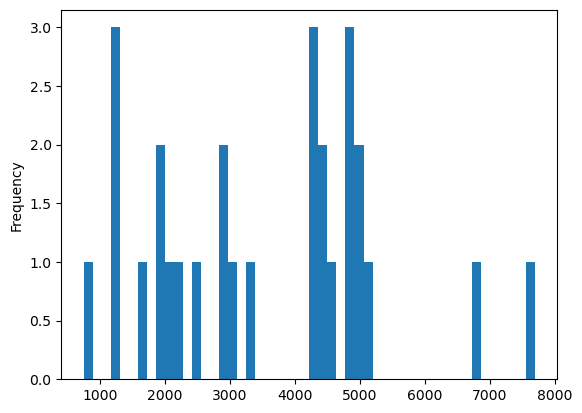

In [28]:
dataset3['TotalPop'].plot.hist(bins=50)

<AxesSubplot: >

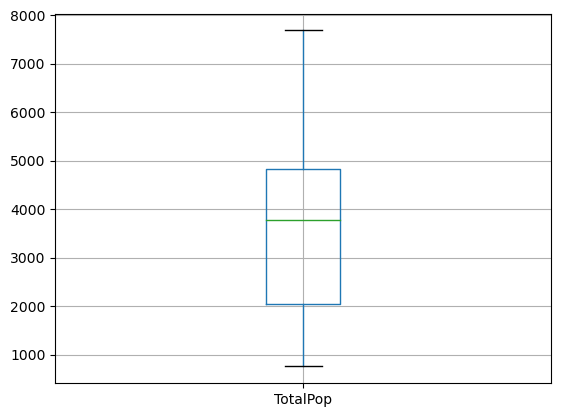

In [29]:
dataset3.boxplot(column=['TotalPop'])

##### I then plot the Black, White and Asian populations separately as a histogram.

<AxesSubplot: ylabel='Frequency'>

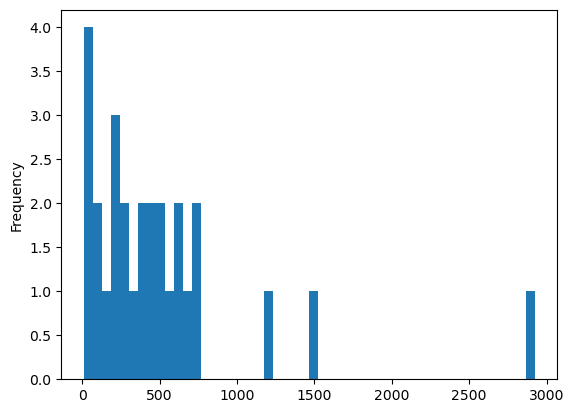

In [30]:
dataset3['Black or African American Alone'].plot.hist(bins=50)

<AxesSubplot: ylabel='Frequency'>

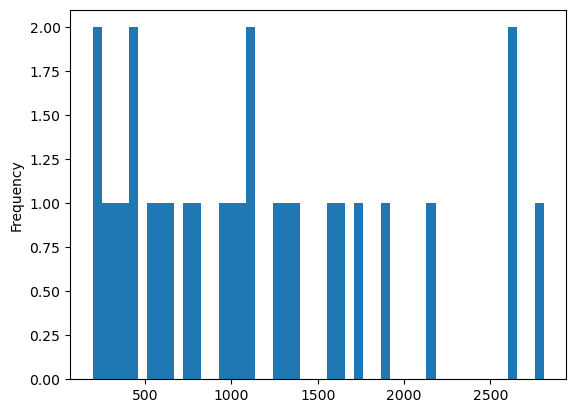

In [31]:
dataset3['White Alone'].plot.hist(bins=50)

<AxesSubplot: ylabel='Frequency'>

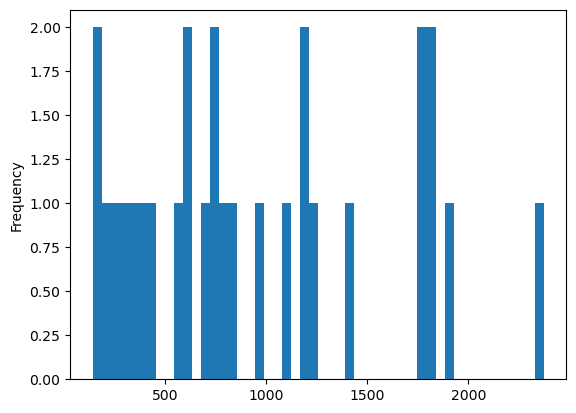

In [32]:
dataset3['Asian Alone'].plot.hist(bins=50)

##### I then plot the intersection of the Black and White populations and notice the two rarely overlap.

<AxesSubplot: xlabel='Black or African American Alone', ylabel='White Alone'>

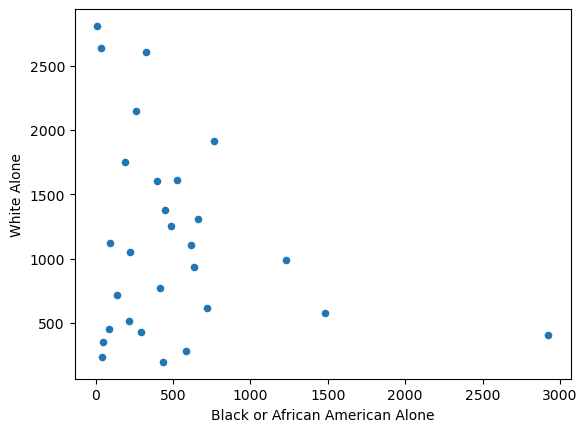

In [33]:
dataset3.plot.scatter(x='Black or African American Alone',y='White Alone')

##### I then plot the intersection of the Asian and White population and notice more overlap.

<AxesSubplot: xlabel='Asian Alone', ylabel='White Alone'>

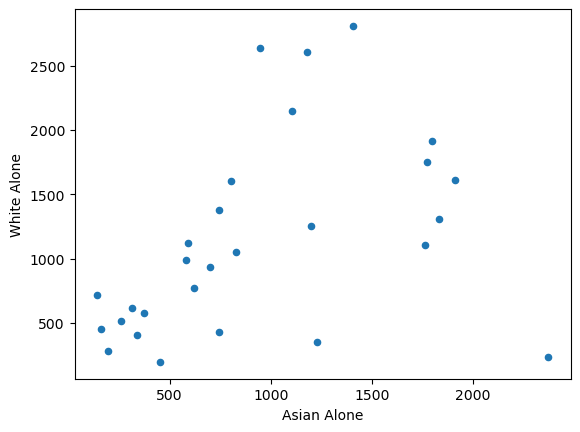

In [34]:
dataset3.plot.scatter(x='Asian Alone',y='White Alone')

##### I then plot the intersection of the Asian and Black population and find little correlation as well. Note, it seems that my Black population is not very large to begin with.

<AxesSubplot: xlabel='Asian Alone', ylabel='Black or African American Alone'>

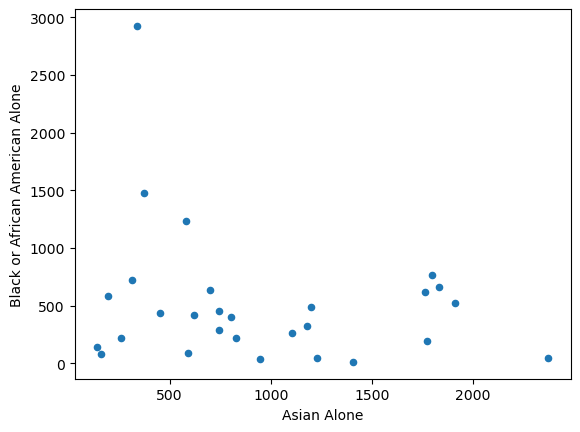

In [35]:
dataset3.plot.scatter(x='Asian Alone',y='Black or African American Alone')

##### Then I plot total population in renter occupied housing units as a histogram.

<AxesSubplot: ylabel='Frequency'>

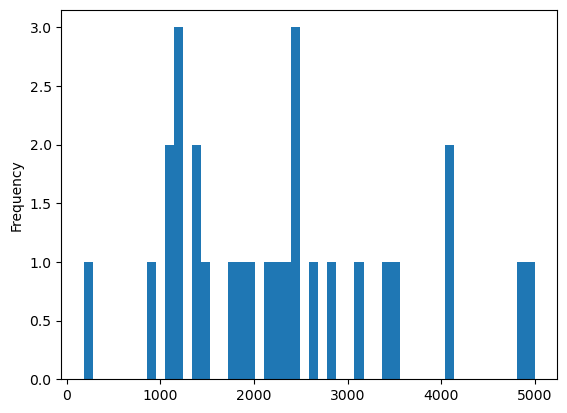

In [36]:
dataset3['Total Population in Renter Occupied Housing Units'].plot.hist(bins=50)

##### I then plot the number of residents (workers above 16) who use public transportation to get to work as a histogram.

<AxesSubplot: ylabel='Frequency'>

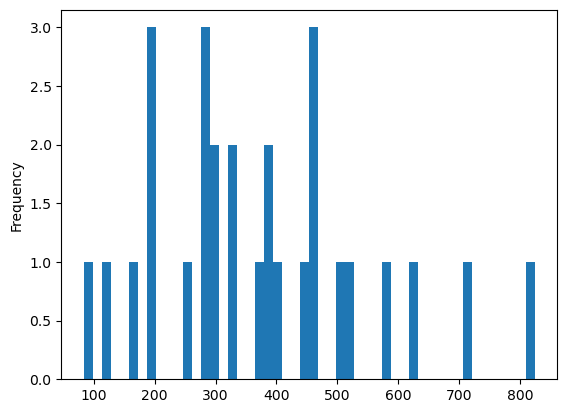

In [37]:
dataset3['Public Transportation [Includes Taxicab]'].plot.hist(bins=50)

##### I then plot the total renter population against the White population and see there is some spread.

<AxesSubplot: xlabel='Total Population in Renter Occupied Housing Units', ylabel='White Alone'>

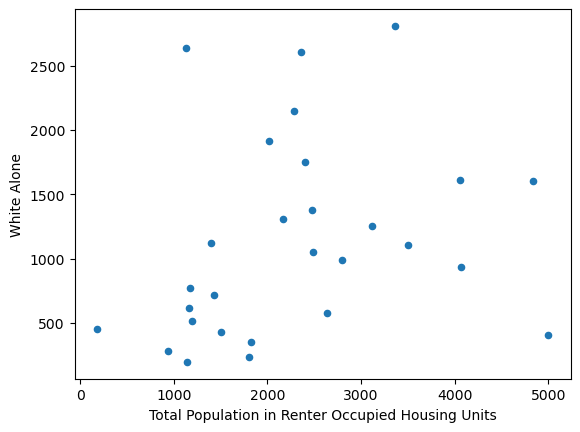

In [38]:
dataset3.plot.scatter(x='Total Population in Renter Occupied Housing Units',y='White Alone')

##### Next I plot the White population against those who use public transportation to get to work.

<AxesSubplot: xlabel='Public Transportation [Includes Taxicab]', ylabel='White Alone'>

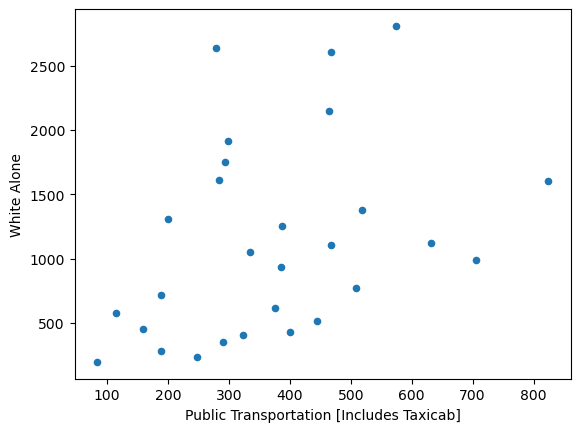

In [39]:
dataset3.plot.scatter(x='Public Transportation [Includes Taxicab]',y='White Alone')

##### Next I plot the Black population against those who use public transportation to get to work. I notice that the Black population is more likely to use public transportation.

<AxesSubplot: xlabel='Public Transportation [Includes Taxicab]', ylabel='Black or African American Alone'>

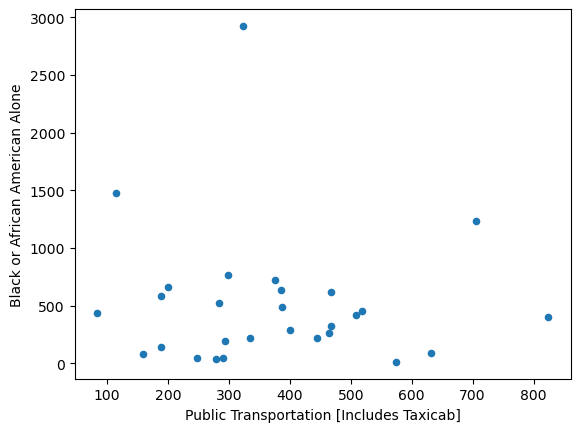

In [40]:
dataset3.plot.scatter(x='Public Transportation [Includes Taxicab]',y='Black or African American Alone')

##### Next I plot the Asian population against those who use public transportation to get to work. I notice more of a spread than the Black population, indicating that Asians are somewhat less likely to use public transportation.

<AxesSubplot: xlabel='Public Transportation [Includes Taxicab]', ylabel='Asian Alone'>

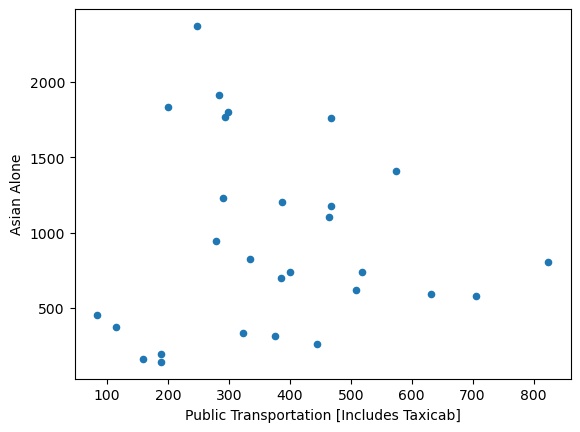

In [41]:
dataset3.plot.scatter(x='Public Transportation [Includes Taxicab]',y='Asian Alone')

##### Next I sort my data by descending value. I've done this for my Total Population.

In [42]:
dataset_sorted = dataset3.sort_values(by='TotalPop',ascending = False)

In [43]:
dataset_sorted[['FIPS','TotalPop']].head(10)

,FIPS,TotalPop
17,06001408800,7688
14,06001407200,6820
12,06001406100,5072
20,06001427300,5036
13,06001406202,4947
23,06001427900,4893
21,06001427600,4861
25,06001428100,4812
26,06001428700,4628
19,06001427200,4418


##### Next I plot the top 10 most populated census tracts as a bar graph and a horizontal bar graph.

<AxesSubplot: xlabel='FIPS'>

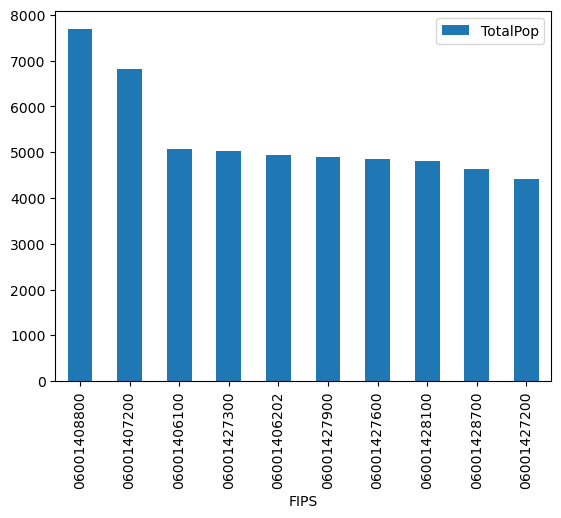

In [44]:
dataset_sorted.head(10).plot.bar(x='FIPS',
                            y='TotalPop')

<AxesSubplot: title={'center': 'Top 10 Census Tracts with Highest Population Along AC Transit Route 19'}, ylabel='FIPS'>

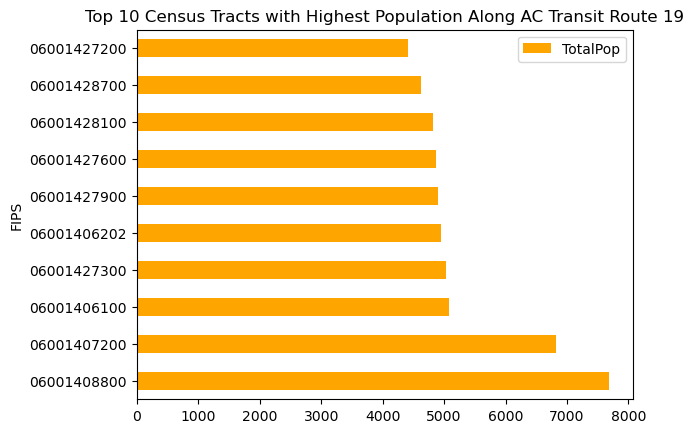

In [45]:
dataset_sorted.head(10).plot.barh(x='FIPS',
                            y='TotalPop', 
                            title='Top 10 Census Tracts with Highest Population Along AC Transit Route 19',
                            color='orange')

##### Next I plot the top 10 census tracts by population of renters as a bar graph. 

In [46]:
dataset_sorted1 = dataset3.sort_values(by='Total Population in Renter Occupied Housing Units',ascending = False)

<AxesSubplot: xlabel='FIPS'>

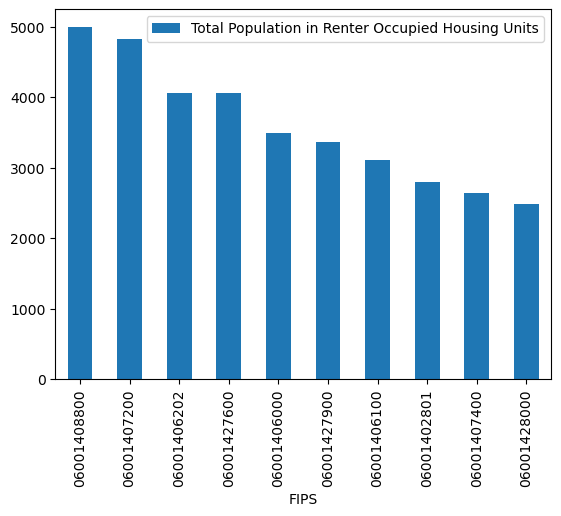

In [47]:
dataset_sorted1.head(10).plot.bar(x='FIPS',
                            y='Total Population in Renter Occupied Housing Units')

##### Next I plot the top 10 census tracts by population that uses public transportation as a bar graph and horizontal bar graph.

In [48]:
dataset_sorted2 = dataset3.sort_values(by='Public Transportation [Includes Taxicab]',ascending = False)

<AxesSubplot: xlabel='FIPS'>

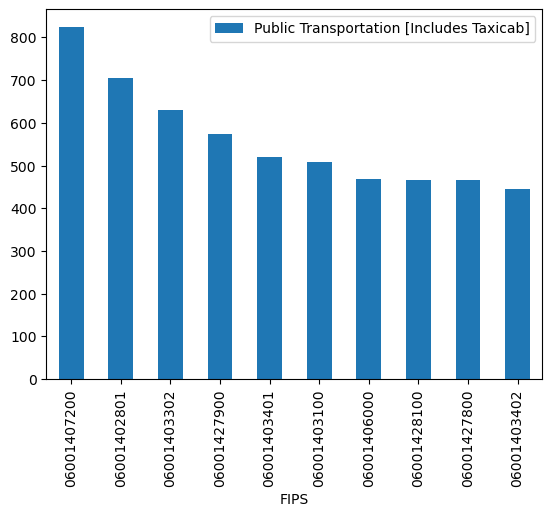

In [49]:
dataset_sorted2.head(10).plot.bar(x='FIPS',
                            y='Public Transportation [Includes Taxicab]')

<AxesSubplot: title={'center': 'Top 10 Census Tracts with Highest Population Using Public Transport Along AC Transit Route 19'}, ylabel='FIPS'>

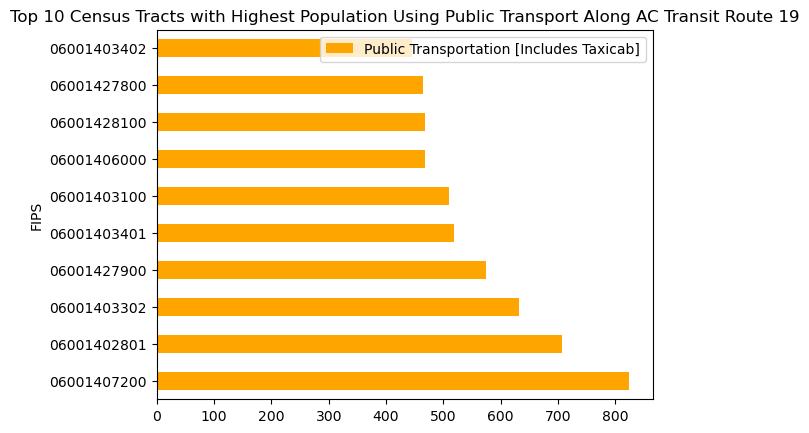

In [50]:
dataset_sorted2.head(10).plot.barh(x='FIPS',
                            y='Public Transportation [Includes Taxicab]', 
                            title='Top 10 Census Tracts with Highest Population Using Public Transport Along AC Transit Route 19',
                            color='orange')

##### Next I querry the census tracts with a white population of less than 500 people.

In [51]:
dataset3[dataset3['White Alone']<=500]

,FIPS,TotalPop,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian or Other Pacific Islander Alone,Some Other Race Alone,Two or More Races,Total Population in Renter Occupied Housing Units,Workers 16 years and Over,"Car, Truck or Van",Drove Alone,Carpooled,Public Transportation [Includes Taxicab],Motorcycle,Bicycle,Walked,Other Means,Worked At Home
0,06001402600,1299,197,437,4,454,0,38,169,1140,612,325,273,52,84,0,5,91,41,66
3,06001402802,1251,284,583,0,195,0,56,133,938,419,62,36,26,188,15,12,33,14,95
4,06001402900,1638,426,291,3,742,0,100,76,1509,789,132,120,12,400,0,19,96,0,142
5,06001403000,2907,239,43,10,2373,73,37,132,1808,1010,398,346,52,247,0,0,258,0,107
7,06001403301,1950,353,47,91,1230,0,79,150,1830,1057,520,376,144,291,0,0,164,0,82
17,06001408800,7688,404,2924,38,336,159,2732,1095,4999,3028,2229,1864,365,323,0,123,140,134,79
27,06001983200,755,455,84,0,161,2,32,21,184,596,148,123,25,159,0,0,23,11,255


##### Next I create a separate dataframe for all census tracts with less than 500 White people corresponding to their FIPS code.

In [119]:
dataset_white_alone = dataset3[dataset3['White Alone']<=500]

In [120]:
dataset_white_alone[['FIPS','White Alone']]

,FIPS,White Alone
0,06001402600,197
3,06001402802,284
4,06001402900,426
5,06001403000,239
7,06001403301,353
17,06001408800,404
27,06001983200,455


##### Next we move to map making. First I querry my data.

In [54]:
import geopandas as gpd

In [55]:
tracts=gpd.read_file('Census_Tract_Boundaries.geojson')
tracts.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,OBJECTID,DIST_NAME,DISTRICT_ID,SHAPE_Length,SHAPE_Area,geometry
0,1,CENSUS TRACT #4001,184,0.142571,0.000712,"MULTIPOLYGON (((-122.24466 37.88364, -122.2425..."
1,2,CENSUS TRACT #4002,185,0.043622,0.000065,"MULTIPOLYGON (((-122.24478 37.85173, -122.2447..."
2,3,CENSUS TRACT #4003,186,0.052941,0.000106,"MULTIPOLYGON (((-122.24939 37.83924, -122.2501..."
3,4,CENSUS TRACT #4004,187,0.037446,0.000074,"MULTIPOLYGON (((-122.25313 37.85154, -122.2530..."
4,5,CENSUS TRACT #4005,188,0.033270,0.000061,"MULTIPOLYGON (((-122.26017 37.85262, -122.2602..."


##### I isolate only the census tracts where the route 19 runs.

In [56]:
tracts = tracts.loc[(tracts['DIST_NAME'] == 'CENSUS TRACT #4026') | (tracts['DIST_NAME'] == 'CENSUS TRACT #4027') |
                    (tracts['DIST_NAME'] == 'CENSUS TRACT #4028.01')|(tracts['DIST_NAME'] == 'CENSUS TRACT #4028.02')|
                   (tracts['DIST_NAME'] == 'CENSUS TRACT #4029')|(tracts['DIST_NAME'] == 'CENSUS TRACT #4030')|
                   (tracts['DIST_NAME'] == 'CENSUS TRACT #4031')| (tracts['DIST_NAME'] == 'CENSUS TRACT #4033.01') |
                   (tracts['DIST_NAME'] == 'CENSUS TRACT #4033.02')| (tracts['DIST_NAME'] == 'CENSUS TRACT #4034.01')|
                   (tracts['DIST_NAME'] == 'CENSUS TRACT #4034.02')|(tracts['DIST_NAME'] == 'CENSUS TRACT #4060')|
                   (tracts['DIST_NAME'] == 'CENSUS TRACT #4061')|(tracts['DIST_NAME'] == 'CENSUS TRACT #4062.02')|
                   (tracts['DIST_NAME'] == 'CENSUS TRACT #4072')|(tracts['DIST_NAME'] == 'CENSUS TRACT #4073')|
                   (tracts['DIST_NAME'] == 'CENSUS TRACT #4074')|(tracts['DIST_NAME'] == 'CENSUS TRACT #4088')|
                   (tracts['DIST_NAME'] == 'CENSUS TRACT #4271')|(tracts['DIST_NAME'] == 'CENSUS TRACT #4272')
                   |(tracts['DIST_NAME'] == 'CENSUS TRACT #4273')|(tracts['DIST_NAME'] == 'CENSUS TRACT #4276')|
                   (tracts['DIST_NAME'] == 'CENSUS TRACT #4278')|(tracts['DIST_NAME'] == 'CENSUS TRACT #4279')|
                   (tracts['DIST_NAME'] == 'CENSUS TRACT #4280')|(tracts['DIST_NAME'] == 'CENSUS TRACT #4281')|
                   (tracts['DIST_NAME'] == 'CENSUS TRACT #4287')|(tracts['DIST_NAME'] == 'CENSUS TRACT #9832')]
tracts

,OBJECTID,DIST_NAME,DISTRICT_ID,SHAPE_Length,SHAPE_Area,geometry
21,22,CENSUS TRACT #4026,209,0.023062,0.000032,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,23,CENSUS TRACT #4027,210,0.024864,0.000039,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,24,CENSUS TRACT #4029,212,0.029851,0.000041,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,25,CENSUS TRACT #4030,213,0.024316,0.000035,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,26,CENSUS TRACT #4031,214,0.024119,0.000036,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,45,CENSUS TRACT #4060,243,0.100612,0.000266,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,46,CENSUS TRACT #4061,244,0.067388,0.000196,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,55,CENSUS TRACT #4072,255,0.037570,0.000073,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,56,CENSUS TRACT #4073,256,0.084682,0.000261,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,57,CENSUS TRACT #4074,257,0.034683,0.000053,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


##### I plot the census tracts where the 19 runs.

<AxesSubplot: >

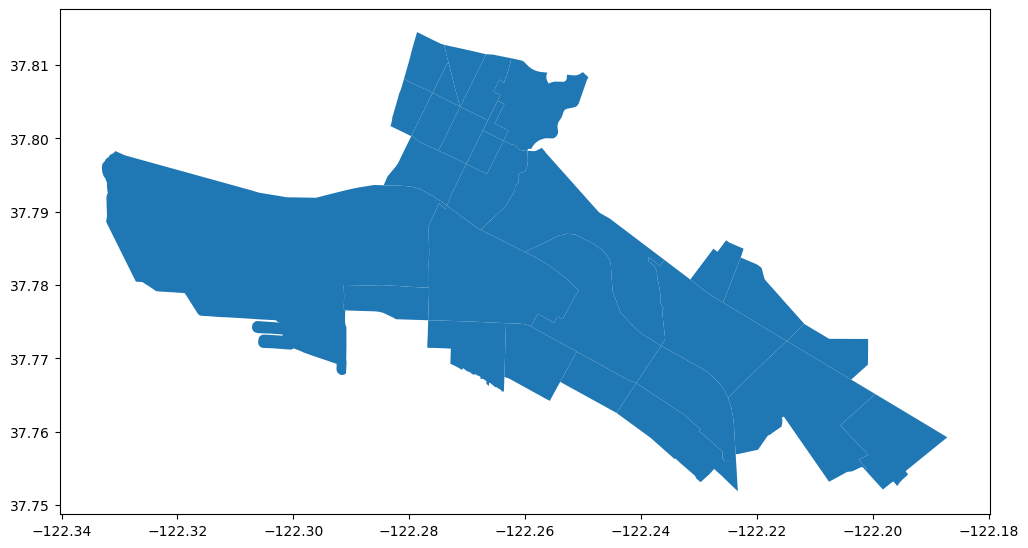

In [57]:
tracts.plot(figsize=(12,10))

##### I querry my dataframe for its components.

In [58]:
tracts.info(verbose=True, show_counts=True)


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 28 entries, 21 to 347
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECTID      28 non-null     int64   
 1   DIST_NAME     28 non-null     object  
 2   DISTRICT_ID   28 non-null     int64   
 3   SHAPE_Length  28 non-null     float64 
 4   SHAPE_Area    28 non-null     float64 
 5   geometry      28 non-null     geometry
dtypes: float64(2), geometry(1), int64(2), object(1)
memory usage: 1.5+ KB


##### I keep only the two columns that I need, namely census tract and geometry.

In [59]:
tracts = tracts[['DIST_NAME','geometry']]
tracts.head()

,DIST_NAME,geometry
21,CENSUS TRACT #4026,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,CENSUS TRACT #4027,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,CENSUS TRACT #4029,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,CENSUS TRACT #4030,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,CENSUS TRACT #4031,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."


##### Unfortunately, this dataframe does not contain FIPS codes, so I replace each Census Tract with a FIPS code 28 times (yawn!).

In [60]:
tracts1=tracts.replace({'DIST_NAME':{'CENSUS TRACT #4026': '402600'}})
tracts1

,DIST_NAME,geometry
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,CENSUS TRACT #4027,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,CENSUS TRACT #4029,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,CENSUS TRACT #4030,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,CENSUS TRACT #4031,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,CENSUS TRACT #4060,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,CENSUS TRACT #4061,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,CENSUS TRACT #4072,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,CENSUS TRACT #4073,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,CENSUS TRACT #4074,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


In [61]:
tracts2=tracts1.replace({'DIST_NAME':{'CENSUS TRACT #4027': '402700'}})
tracts2

,DIST_NAME,geometry
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,CENSUS TRACT #4029,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,CENSUS TRACT #4030,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,CENSUS TRACT #4031,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,CENSUS TRACT #4060,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,CENSUS TRACT #4061,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,CENSUS TRACT #4072,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,CENSUS TRACT #4073,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,CENSUS TRACT #4074,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


In [62]:
tracts3=tracts2.replace({'DIST_NAME':{'CENSUS TRACT #4029': '402900'}})
tracts3

,DIST_NAME,geometry
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,CENSUS TRACT #4030,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,CENSUS TRACT #4031,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,CENSUS TRACT #4060,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,CENSUS TRACT #4061,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,CENSUS TRACT #4072,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,CENSUS TRACT #4073,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,CENSUS TRACT #4074,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


In [63]:
tracts4=tracts3.replace({'DIST_NAME':{'CENSUS TRACT #4030': '403000'}})
tracts4

,DIST_NAME,geometry
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,CENSUS TRACT #4031,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,CENSUS TRACT #4060,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,CENSUS TRACT #4061,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,CENSUS TRACT #4072,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,CENSUS TRACT #4073,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,CENSUS TRACT #4074,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


In [64]:
tracts5=tracts4.replace({'DIST_NAME':{'CENSUS TRACT #4031': '403100'}})
tracts5

,DIST_NAME,geometry
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,403100,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,CENSUS TRACT #4060,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,CENSUS TRACT #4061,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,CENSUS TRACT #4072,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,CENSUS TRACT #4073,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,CENSUS TRACT #4074,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


In [65]:
tracts6=tracts5.replace({'DIST_NAME':{'CENSUS TRACT #4060': '406000'}})
tracts6

,DIST_NAME,geometry
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,403100,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,406000,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,CENSUS TRACT #4061,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,CENSUS TRACT #4072,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,CENSUS TRACT #4073,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,CENSUS TRACT #4074,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


In [66]:
tracts7=tracts6.replace({'DIST_NAME':{'CENSUS TRACT #4061': '406100'}})
tracts7

,DIST_NAME,geometry
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,403100,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,406000,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,406100,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,CENSUS TRACT #4072,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,CENSUS TRACT #4073,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,CENSUS TRACT #4074,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


In [67]:
tracts8=tracts7.replace({'DIST_NAME':{'CENSUS TRACT #4072': '407200'}})
tracts8

,DIST_NAME,geometry
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,403100,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,406000,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,406100,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,407200,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,CENSUS TRACT #4073,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,CENSUS TRACT #4074,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


In [68]:
tracts9=tracts8.replace({'DIST_NAME':{'CENSUS TRACT #4073': '407300'}})
tracts9

,DIST_NAME,geometry
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,403100,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,406000,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,406100,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,407200,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,407300,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,CENSUS TRACT #4074,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


In [69]:
tracts10=tracts9.replace({'DIST_NAME':{'CENSUS TRACT #4074': '407400'}})
tracts10

,DIST_NAME,geometry
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,403100,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,406000,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,406100,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,407200,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,407300,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,407400,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


In [70]:
tracts11=tracts10.replace({'DIST_NAME':{'CENSUS TRACT #4088': '408800'}})
tracts11

,DIST_NAME,geometry
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,403100,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,406000,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,406100,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,407200,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,407300,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,407400,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


In [71]:
tracts12=tracts11.replace({'DIST_NAME':{'CENSUS TRACT #4271': '427100'}})
tracts12

,DIST_NAME,geometry
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,403100,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,406000,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,406100,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,407200,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,407300,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,407400,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


In [72]:
tracts13=tracts12.replace({'DIST_NAME':{'CENSUS TRACT #4272': '427200'}})
tracts13

,DIST_NAME,geometry
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,403100,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,406000,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,406100,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,407200,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,407300,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,407400,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


In [73]:
tracts14=tracts13.replace({'DIST_NAME':{'CENSUS TRACT #4273': '427300'}})
tracts14

,DIST_NAME,geometry
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,403100,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,406000,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,406100,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,407200,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,407300,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,407400,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


In [74]:
tracts15=tracts14.replace({'DIST_NAME':{'CENSUS TRACT #4276': '427600'}})
tracts15

,DIST_NAME,geometry
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,403100,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,406000,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,406100,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,407200,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,407300,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,407400,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


In [75]:
tracts16=tracts15.replace({'DIST_NAME':{'CENSUS TRACT #4278': '427800'}})
tracts16

,DIST_NAME,geometry
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,403100,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,406000,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,406100,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,407200,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,407300,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,407400,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


In [76]:
tracts17=tracts16.replace({'DIST_NAME':{'CENSUS TRACT #4279': '427900'}})
tracts17

,DIST_NAME,geometry
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,403100,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,406000,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,406100,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,407200,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,407300,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,407400,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


In [77]:
tracts18=tracts17.replace({'DIST_NAME':{'CENSUS TRACT #4280': '428000'}})
tracts18

,DIST_NAME,geometry
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,403100,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,406000,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,406100,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,407200,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,407300,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,407400,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


In [78]:
tracts19=tracts18.replace({'DIST_NAME':{'CENSUS TRACT #4281': '428100'}})
tracts19

,DIST_NAME,geometry
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,403100,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,406000,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,406100,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,407200,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,407300,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,407400,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


In [79]:
tracts20=tracts19.replace({'DIST_NAME':{'CENSUS TRACT #4062.02': '406202'}})
tracts20

,DIST_NAME,geometry
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,403100,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,406000,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,406100,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,407200,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,407300,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,407400,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


In [80]:
tracts21=tracts20.replace({'DIST_NAME':{'CENSUS TRACT #9832': '983200'}})
tracts21

,DIST_NAME,geometry
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,403100,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,406000,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,406100,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,407200,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,407300,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,407400,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


In [81]:
tracts22=tracts21.replace({'DIST_NAME':{'CENSUS TRACT #4287': '428700'}})
tracts22

,DIST_NAME,geometry
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,403100,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,406000,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,406100,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,407200,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,407300,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,407400,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


In [82]:
tracts23=tracts22.replace({'DIST_NAME':{'CENSUS TRACT #4028.01': '402801'}})
tracts23

,DIST_NAME,geometry
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,403100,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,406000,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,406100,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,407200,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,407300,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,407400,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


In [83]:
tracts24=tracts23.replace({'DIST_NAME':{'CENSUS TRACT #4028.02': '402802'}})
tracts24

,DIST_NAME,geometry
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,403100,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,406000,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,406100,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,407200,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,407300,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,407400,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


In [84]:
tracts25=tracts24.replace({'DIST_NAME':{'CENSUS TRACT #4033.01': '403301'}})
tracts25

,DIST_NAME,geometry
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,403100,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,406000,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,406100,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,407200,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,407300,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,407400,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


In [85]:
tracts26=tracts25.replace({'DIST_NAME':{'CENSUS TRACT #4033.02': '403302'}})
tracts26

,DIST_NAME,geometry
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,403100,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,406000,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,406100,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,407200,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,407300,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,407400,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


In [86]:
tracts27=tracts26.replace({'DIST_NAME':{'CENSUS TRACT #4034.01': '403401'}})
tracts27

,DIST_NAME,geometry
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,403100,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,406000,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,406100,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,407200,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,407300,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,407400,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


In [87]:
tracts28=tracts27.replace({'DIST_NAME':{'CENSUS TRACT #4034.02': '403402'}})
tracts28

,DIST_NAME,geometry
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796..."
22,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731..."
23,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634..."
24,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701..."
25,403100,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749..."
44,406000,"MULTIPOLYGON (((-122.25670 37.79833, -122.2566..."
45,406100,"MULTIPOLYGON (((-122.23701 37.78279, -122.2367..."
54,407200,"MULTIPOLYGON (((-122.21391 37.77306, -122.2148..."
55,407300,"MULTIPOLYGON (((-122.20317 37.76255, -122.2041..."
56,407400,"MULTIPOLYGON (((-122.20338 37.76731, -122.2037..."


##### Next I add a new column called FIPS and add the state and county codes.

In [88]:
tracts28['FIPS'] ='06' + '001' + tracts28['DIST_NAME']

In [89]:
tracts28.head()

,DIST_NAME,geometry,FIPS
21,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796...",06001402600
22,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731...",06001402700
23,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634...",06001402900
24,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701...",06001403000
25,403100,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749...",06001403100


##### I then merge my two datasets together along the common column FIPS

In [90]:
tracts_merge=tracts28.merge(dataset3,on="FIPS")

In [91]:
tracts_merge.head()

,DIST_NAME,geometry,FIPS,TotalPop,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian or Other Pacific Islander Alone,Some Other Race Alone,Two or More Races,Total Population in Renter Occupied Housing Units,Workers 16 years and Over,"Car, Truck or Van",Drove Alone,Carpooled,Public Transportation [Includes Taxicab],Motorcycle,Bicycle,Walked,Other Means,Worked At Home
0,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796...",06001402600,1299,197,437,4,454,0,38,169,1140,612,325,273,52,84,0,5,91,41,66
1,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731...",06001402700,1988,616,717,0,313,0,252,90,1160,1188,524,396,128,375,0,49,86,6,148
2,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634...",06001402900,1638,426,291,3,742,0,100,76,1509,789,132,120,12,400,0,19,96,0,142
3,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701...",06001403000,2907,239,43,10,2373,73,37,132,1808,1010,398,346,52,247,0,0,258,0,107
4,403100,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749...",06001403100,2054,774,416,0,620,13,116,115,1178,1106,325,309,16,509,0,0,55,10,207


##### Then I map out the Black population.

<AxesSubplot: >

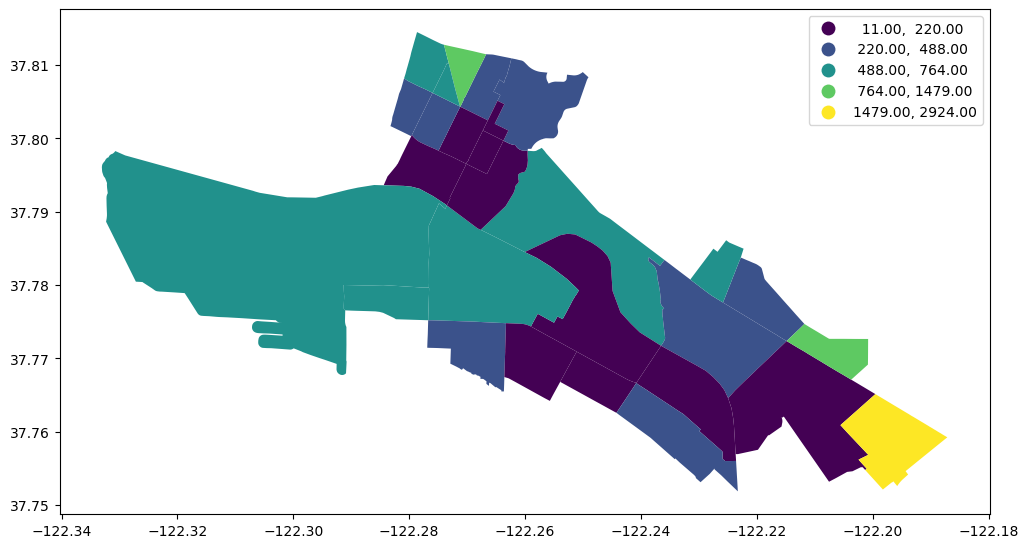

In [92]:
tracts_merge.plot(figsize=(12,10),
                 column='Black or African American Alone',
                 legend=True, 
                 scheme='NaturalBreaks')

##### I do the same but this time using quantiles to gain a more proportional understanding of the population.

<AxesSubplot: >

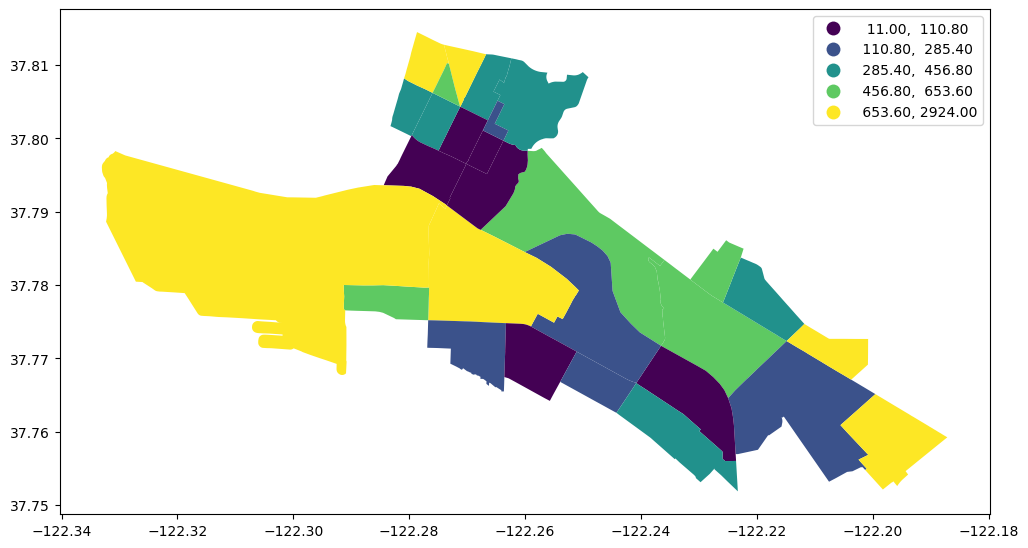

In [93]:
tracts_merge.plot(figsize=(12,10),
                 column='Black or African American Alone',
                 legend=True, 
                 scheme='quantiles')

##### I do the same for the renter population.

<AxesSubplot: >

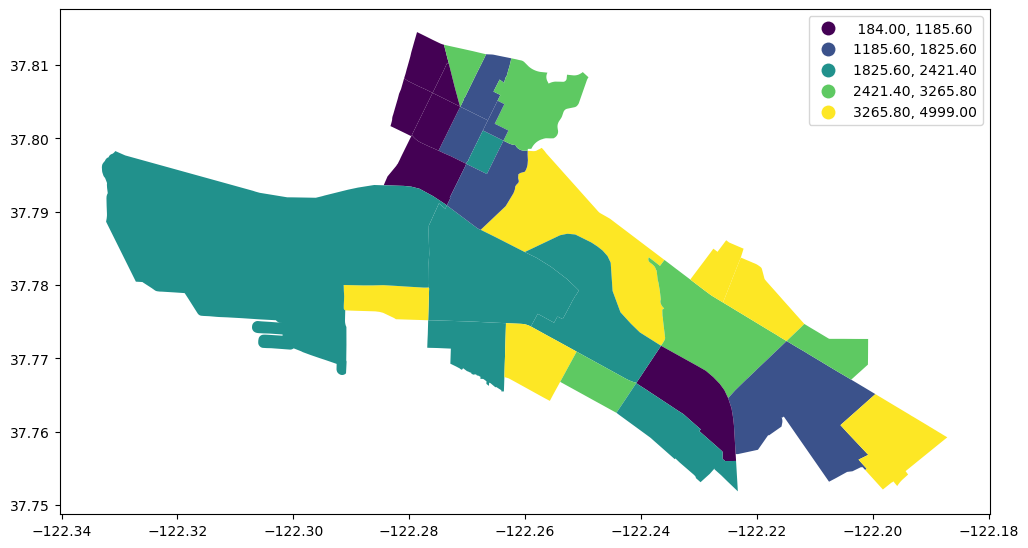

In [94]:
tracts_merge.plot(figsize=(12,10),
                 column='Total Population in Renter Occupied Housing Units',
                 legend=True, 
                 scheme='quantiles')

##### Here I create a new column, namely the percentages of each racial group.

In [95]:
tracts_merge['PCT_Black'] = tracts_merge['Black or African American Alone']/tracts_merge['TotalPop']*100
tracts_merge['PCT_White'] = tracts_merge['White Alone']/tracts_merge['TotalPop']*100
tracts_merge['PCT_Asian'] = tracts_merge['Asian Alone']/tracts_merge['TotalPop']*100

tracts_merge.head()

,DIST_NAME,geometry,FIPS,TotalPop,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian or Other Pacific Islander Alone,Some Other Race Alone,Two or More Races,Total Population in Renter Occupied Housing Units,Workers 16 years and Over,"Car, Truck or Van",Drove Alone,Carpooled,Public Transportation [Includes Taxicab],Motorcycle,Bicycle,Walked,Other Means,Worked At Home,PCT_Black,PCT_White,PCT_Asian
0,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796...",06001402600,1299,197,437,4,454,0,38,169,1140,612,325,273,52,84,0,5,91,41,66,33.641263,15.165512,34.949962
1,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731...",06001402700,1988,616,717,0,313,0,252,90,1160,1188,524,396,128,375,0,49,86,6,148,36.066398,30.985915,15.744467
2,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634...",06001402900,1638,426,291,3,742,0,100,76,1509,789,132,120,12,400,0,19,96,0,142,17.765568,26.007326,45.299145
3,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701...",06001403000,2907,239,43,10,2373,73,37,132,1808,1010,398,346,52,247,0,0,258,0,107,1.479188,8.221534,81.630547
4,403100,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749...",06001403100,2054,774,416,0,620,13,116,115,1178,1106,325,309,16,509,0,0,55,10,207,20.253165,37.682571,30.185005


##### I plot the population percentage of Blacks, Whites and Asians.

<AxesSubplot: >

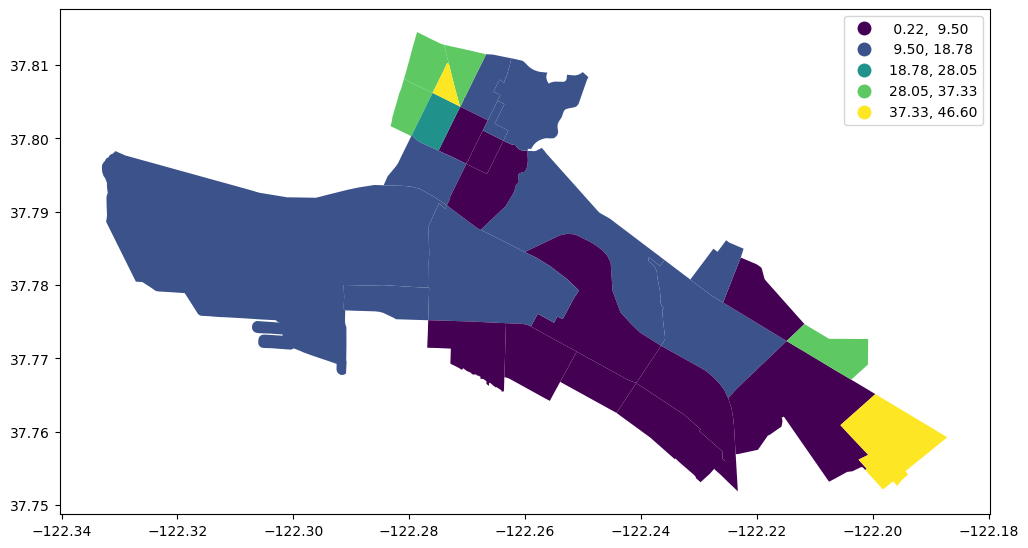

In [96]:
tracts_merge.plot(figsize=(12,10),
                 column='PCT_Black',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot: >

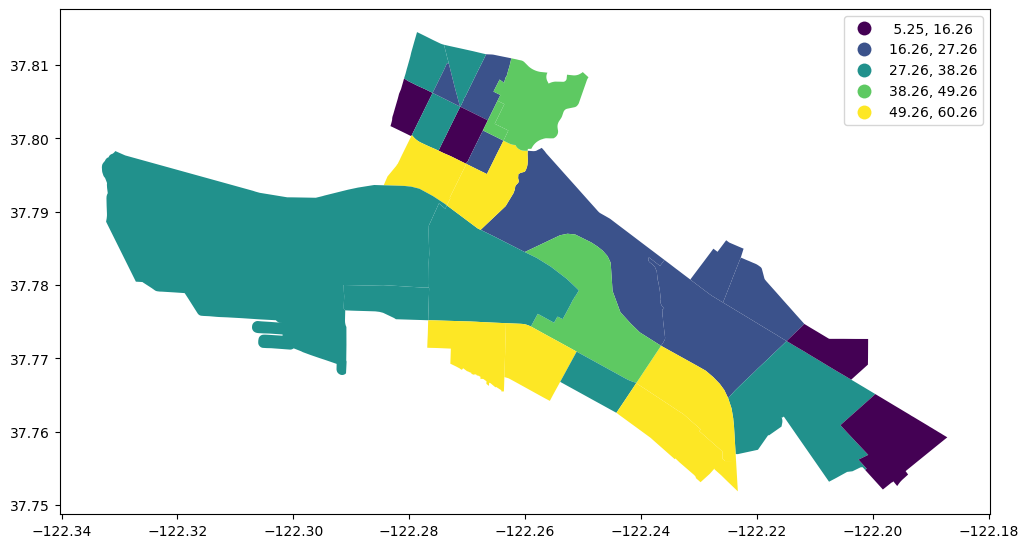

In [97]:
tracts_merge.plot(figsize=(12,10),
                 column='PCT_White',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot: >

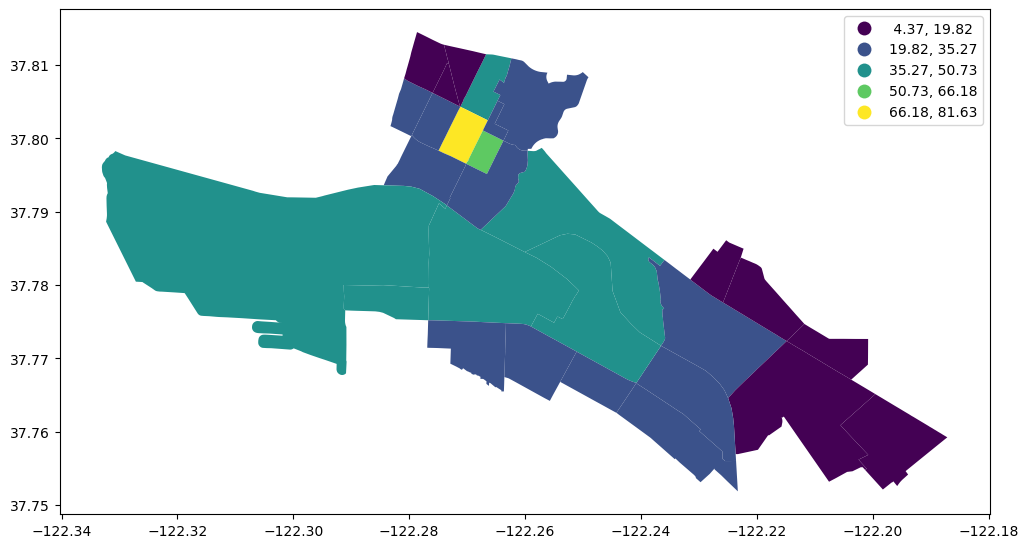

In [98]:
tracts_merge.plot(figsize=(12,10),
                 column='PCT_Asian',
                 legend=True, 
                 scheme='equal_interval')

##### Then I create a new column, percentage non-white.

In [102]:
tracts_merge['NonWhite'] = tracts_merge['TotalPop']-tracts_merge['White Alone']
tracts_merge['PCT_NonWhite'] = tracts_merge['NonWhite']/tracts_merge['TotalPop']*100

In [103]:
tracts_merge.head()

,DIST_NAME,geometry,FIPS,TotalPop,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian or Other Pacific Islander Alone,Some Other Race Alone,Two or More Races,Total Population in Renter Occupied Housing Units,Workers 16 years and Over,"Car, Truck or Van",Drove Alone,Carpooled,Public Transportation [Includes Taxicab],Motorcycle,Bicycle,Walked,Other Means,Worked At Home,PCT_Black,PCT_White,PCT_Asian,NonWhite,PCT_NonWhite
0,402600,"MULTIPOLYGON (((-122.27957 37.80041, -122.2796...",06001402600,1299,197,437,4,454,0,38,169,1140,612,325,273,52,84,0,5,91,41,66,33.641263,15.165512,34.949962,1102,84.834488
1,402700,"MULTIPOLYGON (((-122.27329 37.81061, -122.2731...",06001402700,1988,616,717,0,313,0,252,90,1160,1188,524,396,128,375,0,49,86,6,148,36.066398,30.985915,15.744467,1372,69.014085
2,402900,"MULTIPOLYGON (((-122.26343 37.80810, -122.2634...",06001402900,1638,426,291,3,742,0,100,76,1509,789,132,120,12,400,0,19,96,0,142,17.765568,26.007326,45.299145,1212,73.992674
3,403000,"MULTIPOLYGON (((-122.27009 37.79669, -122.2701...",06001403000,2907,239,43,10,2373,73,37,132,1808,1010,398,346,52,247,0,0,258,0,107,1.479188,8.221534,81.630547,2668,91.778466
4,403100,"MULTIPOLYGON (((-122.27487 37.79843, -122.2749...",06001403100,2054,774,416,0,620,13,116,115,1178,1106,325,309,16,509,0,0,55,10,207,20.253165,37.682571,30.185005,1280,62.317429


##### I map out non-white percentage. 

<AxesSubplot: >

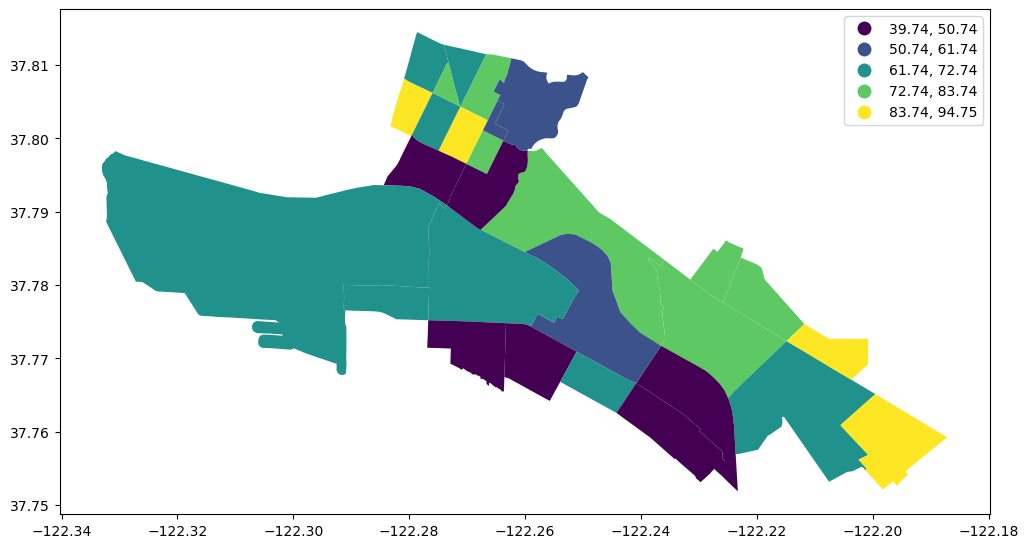

In [105]:
tracts_merge.plot(figsize=(12,10),
                 column='PCT_NonWhite',
                 legend=True, 
                 scheme='equal_interval')

##### I create new column of percentages of the population that use a car, public transportation and walking to get to work.

In [106]:
tracts_merge['PCT_Car'] = tracts_merge['Car, Truck or Van']/tracts_merge['Workers 16 years and Over']*100
tracts_merge['PCT_PublicTransportation'] = tracts_merge['Public Transportation [Includes Taxicab]']/tracts_merge['Workers 16 years and Over']*100
tracts_merge['PCT_Walk'] = tracts_merge['Walked']/tracts_merge['Workers 16 years and Over']*100

##### Map out percentages that use a car, take public transportation and walk.

<AxesSubplot: >

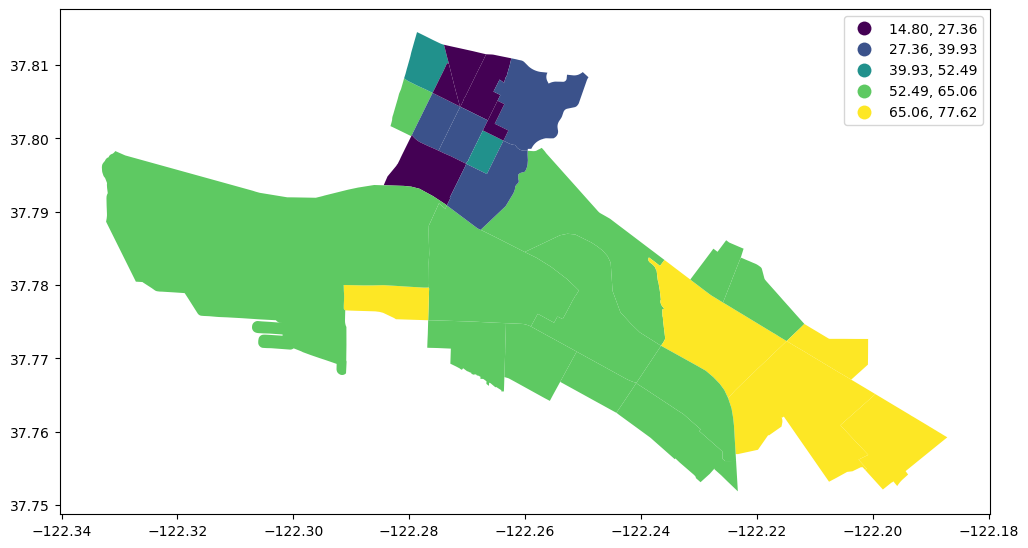

In [107]:
tracts_merge.plot(figsize=(12,10),
                 column='PCT_Car',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot: >

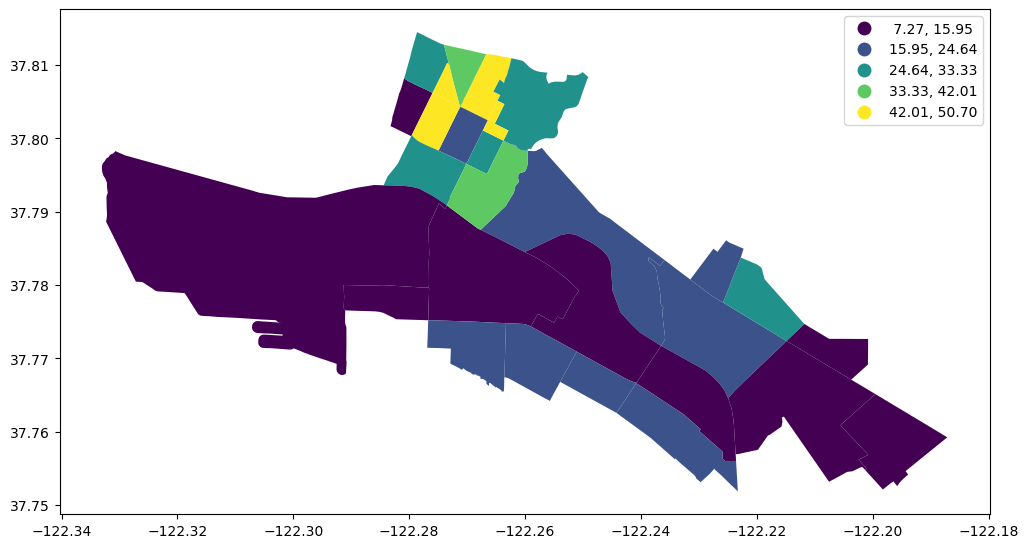

In [108]:
tracts_merge.plot(figsize=(12,10),
                 column='PCT_PublicTransportation',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot: >

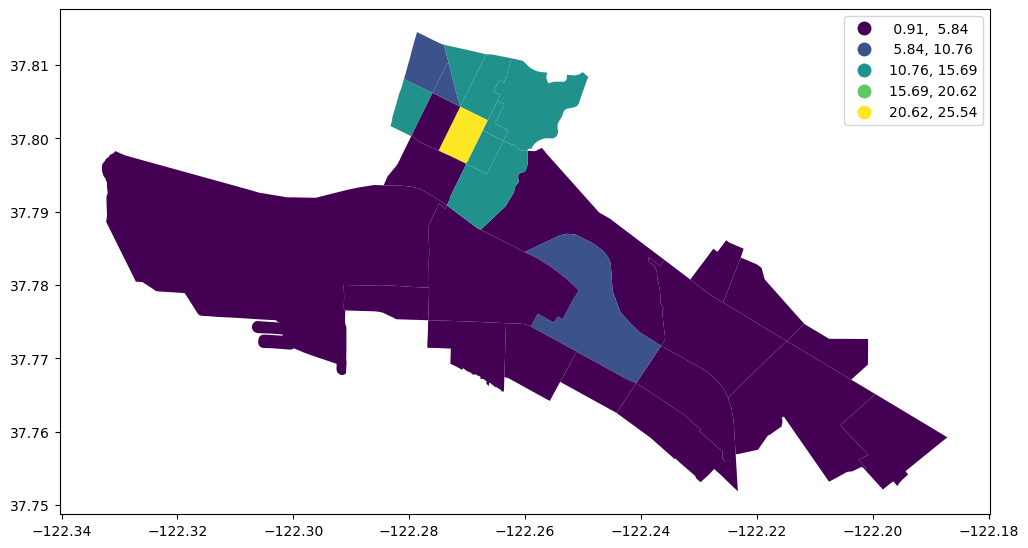

In [109]:
tracts_merge.plot(figsize=(12,10),
                 column='PCT_Walk',
                 legend=True, 
                 scheme='equal_interval')

##### Next I am interested in the census tracts as they correspond to each dimension. First I plot out the census tracts with a non-white population above 50%. Unsurprisingly, it is the vast majority of census tracts.

<AxesSubplot: >

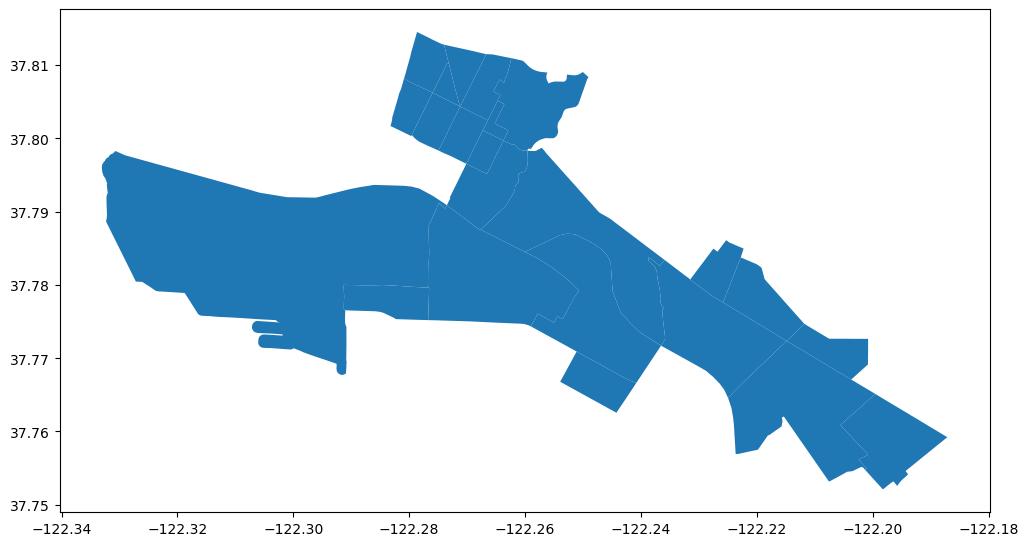

In [110]:
tracts_merge[tracts_merge.PCT_NonWhite > 50].plot(figsize=(12,10))

##### Next I zoom in on census tracts with an Asian population greater than 25%. Tracts in the western half of the route show up.

<AxesSubplot: >

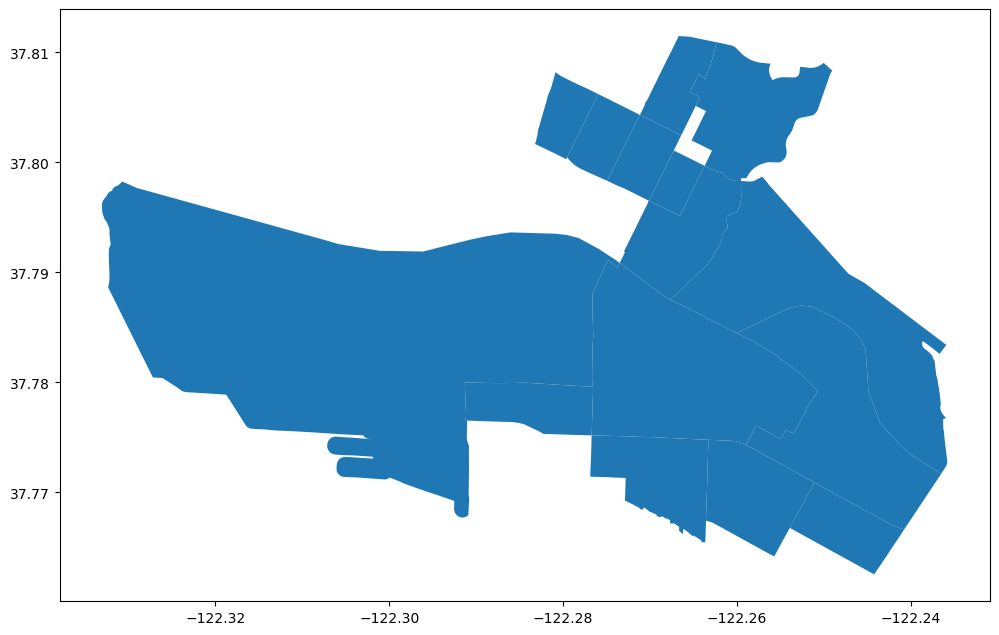

In [111]:
tracts_merge[tracts_merge.PCT_Asian > 25].plot(figsize=(12,10))

##### Next I want to see where the Black population is more than 25%, and find that this is the case in a few census tracts.

<AxesSubplot: >

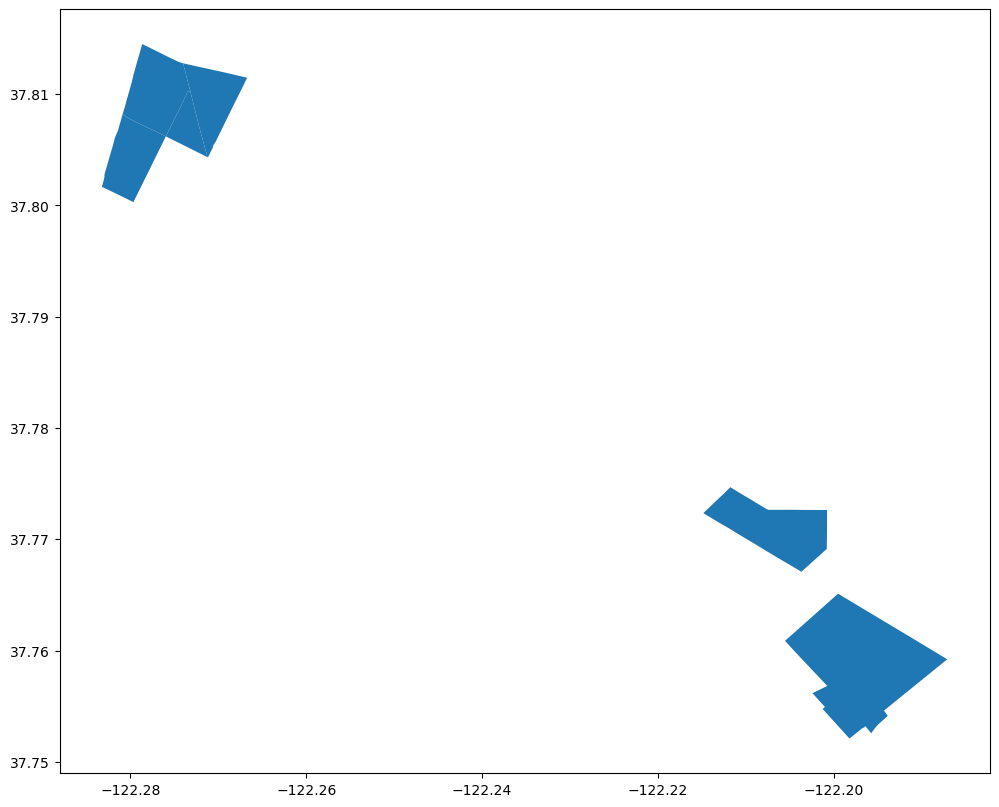

In [121]:
tracts_merge[tracts_merge.PCT_Black > 25].plot(figsize=(12,10))

##### Next I analyze census tracts where more than 50% use a car to get to work. This is the majority of the southern census tracts.

<AxesSubplot: >

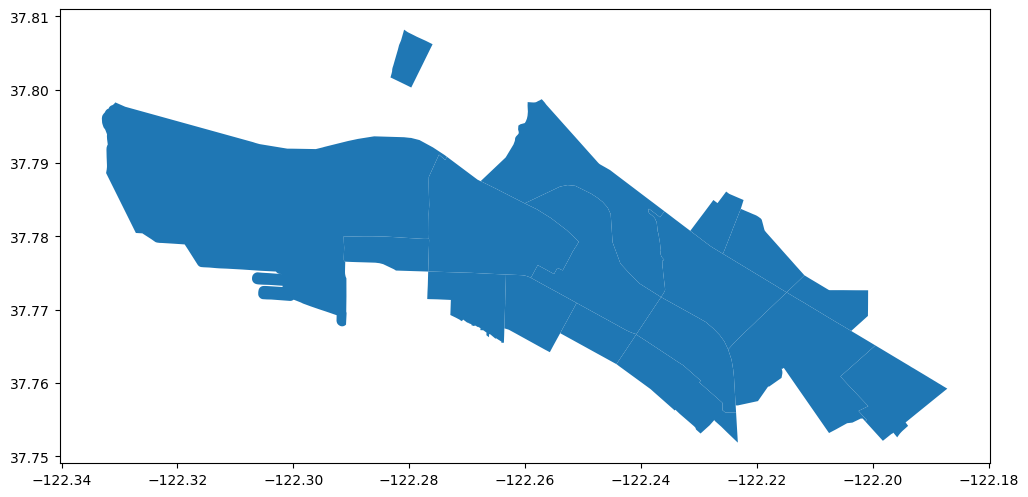

In [112]:
tracts_merge[tracts_merge.PCT_Car > 50].plot(figsize=(12,10))

##### Then I analyze tracts where more than 25% use public transportation to get to work. This shows up tracts in the northwest corner of the route and one in the southwestern corner.

<AxesSubplot: >

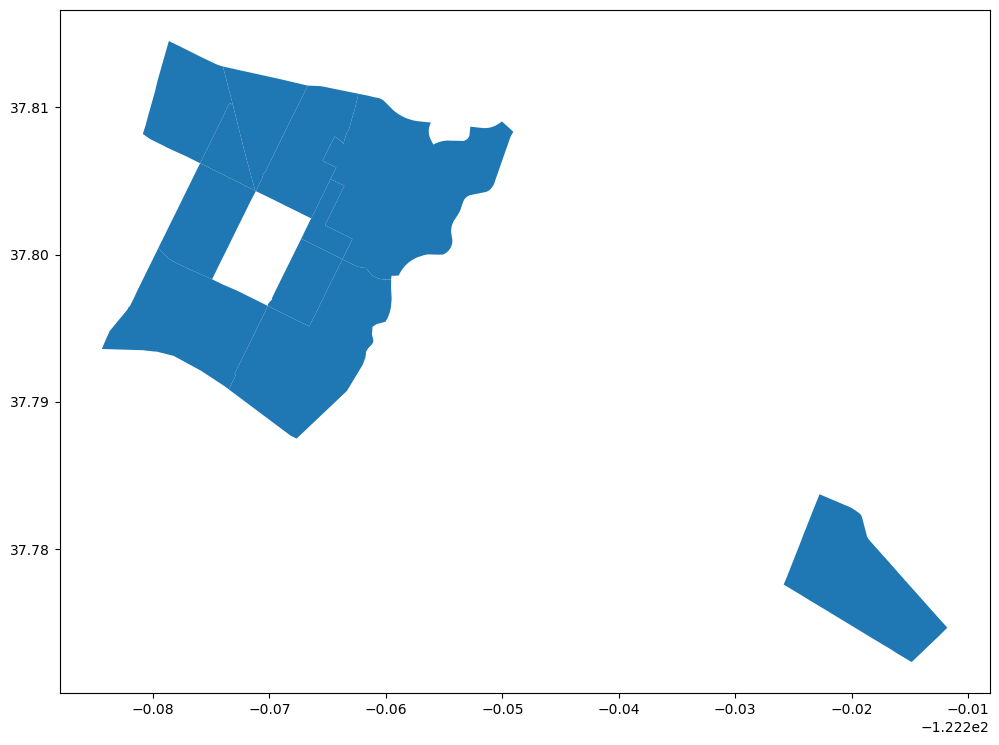

In [113]:
tracts_merge[tracts_merge.PCT_PublicTransportation > 25].plot(figsize=(12,10))

##### Next I create a new column, percent renters. I plot the census tracts where percent renters is above 50% and this brings up the majority of census tracts. In the next map, I also plot out the percentages for all census tracts.

In [114]:
tracts_merge['PCT_Renters'] = tracts_merge['Total Population in Renter Occupied Housing Units']/tracts_merge['TotalPop']*100

<AxesSubplot: >

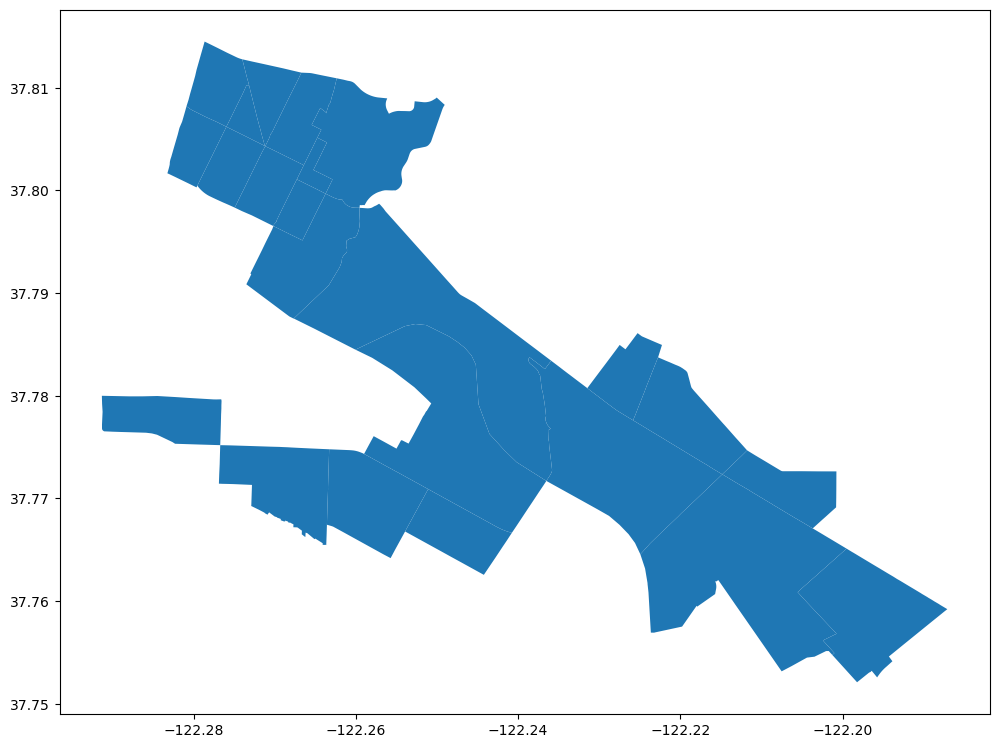

In [115]:
tracts_merge[tracts_merge.PCT_Renters > 50].plot(figsize=(12,10))

<AxesSubplot: >

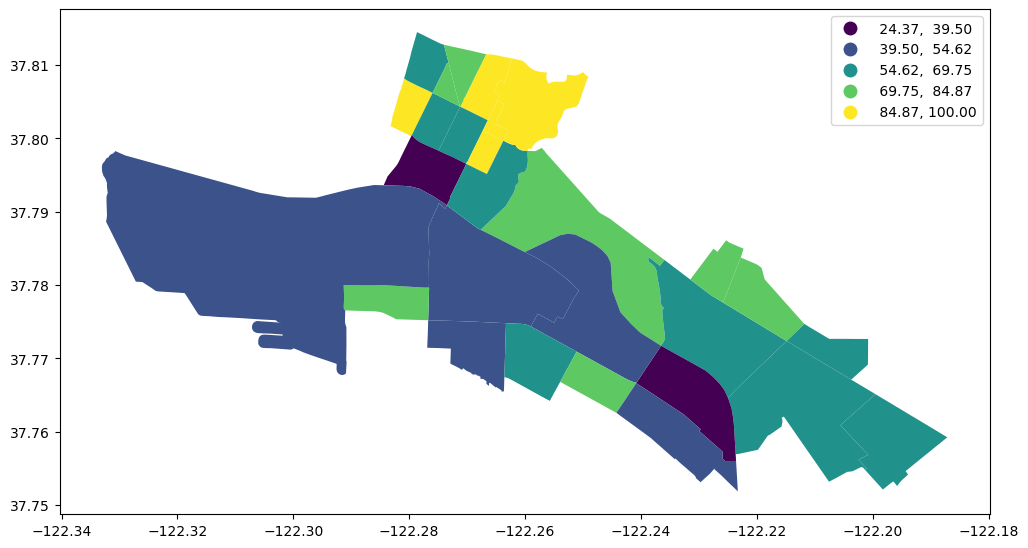

In [116]:
tracts_merge.plot(figsize=(12,10),
                 column='PCT_Renters',
                 legend=True, 
                 scheme='equal_interval')

##### Finally, I want to show the non-white population against the total population. I create a Folium map to do so.

In [117]:
import folium

In [118]:
m = folium.Map(location=[37.8,-122.2], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

folium.Choropleth(
                  geo_data=tracts_merge, 
                  data=tracts_merge,           
                  key_on='feature.properties.FIPS', 
                  columns=['FIPS', 'PCT_NonWhite'], 
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, 
                  legend_name='Population NonWhite along AC Transit 19').add_to(m)

